In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
%matplotlib inline
import numpy as np

# Part I. Crime statistics

Crime Rate in 47 states of the USA with 13 explanatory variables  
The crime rate (**Y**) in 47 states in the U.S. was reported together with possible factors that might influence it. The factors recorded are as follows;  
X1 = the number of males aged 14 - 24 per 1000 of total state population  
X2 = binary variable distinguishing southern states (X2 =1) from the rest (X2=0).  
X3 = the mean number of years of schooling x 10 of the population, 25 years old and over  
X4 = police expenditure (in dollars) per person by state and local government in 1960  
X5 = police expenditure (in dollars) per person by state and local government in 1959  
X6 = labour force participation rate per 1000 civilian urban males in the age group 14-24  
X7 = the number of males per 1000 females  
X8 = state population size in hundred thousands  
X9 = unemployment rate of urban males per 1000 in the age group 14-24    
X10 = unemployment rate of urban males per 1000 in the age group 35-59.  
X11 = the median value of family income or transferable goods and assets (unit 10 dollars)  
X12 = the number of families per 1000 earning below one-half of the median income.  

In [2]:
data = pd.read_excel('Crime.xlsx')

In [3]:
features = ['males','south','yrsSch','policExp60','policeExp59','labour',
           'M/F','statePop','unemp14','unemp35','income','proverty']

In [4]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Y
0,151,1,91,58,56,510,950,33,108,41,394,261,79.1
1,143,0,113,103,95,583,1012,13,96,36,557,194,163.5
2,142,1,89,45,44,533,969,18,94,33,318,250,57.8
3,136,0,121,149,141,577,994,157,102,39,673,167,196.9
4,141,0,121,109,101,591,985,18,91,20,578,174,123.4


## Q1. Report the correlation coefficients between each feature and the output variable Y (crimes per 100.000)

In [5]:
data.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Y
X1,1.000000,0.584355,-0.530240,-0.505737,-0.513173,-0.160949,-0.028680,-0.280638,-0.224381,-0.244843,-0.670055,0.639211,-0.089472
X2,0.584355,1.000000,-0.702741,-0.372636,-0.376168,-0.505469,-0.314733,-0.049918,-0.172419,0.071693,-0.636945,0.737181,-0.090637
X3,-0.530240,-0.702741,1.000000,0.482952,0.499410,0.561178,0.436915,-0.017227,0.018103,-0.215682,0.735997,-0.768658,0.322835
X4,-0.505737,-0.372636,0.482952,1.000000,0.993586,0.121493,0.033760,0.526284,-0.043698,0.185093,0.787225,-0.630500,0.687604
X5,-0.513173,-0.376168,0.499410,0.993586,1.000000,0.106350,0.022843,0.513789,-0.051712,0.169224,0.794262,-0.648152,0.666714
X6,-0.160949,-0.505469,0.561178,0.121493,0.106350,1.000000,0.513559,-0.123672,-0.229400,-0.420762,0.294632,-0.269886,0.188866
X7,-0.028680,-0.314733,0.436915,0.033760,0.022843,0.513559,1.000000,-0.410628,0.351892,-0.018692,0.179609,-0.167089,0.213914
X8,-0.280638,-0.049918,-0.017227,0.526284,0.513789,-0.123672,-0.410628,1.000000,-0.038120,0.270422,0.308263,-0.126294,0.337474
X9,-0.224381,-0.172419,0.018103,-0.043698,-0.051712,-0.229400,0.351892,-0.038120,1.000000,0.745925,0.044857,-0.063832,-0.050478
X10,-0.244843,0.071693,-0.215682,0.185093,0.169224,-0.420762,-0.018692,0.270422,0.745925,1.000000,0.092072,0.015678,0.177321


## Q2. Look at the impact of each feature separately (on all 47 observations)
    # Fit bi-variate regressions and report the estimate as well as the p-values

In [6]:
# An anonymous function that returns your regression model for future usage
Regress = lambda feature: smf.ols(formula = 'Y ~ %s'%feature, data = data).fit()

In [7]:
ptable = list()
estable = list()
corrtable = list()
for i in range(12):
    lm1 = Regress('data.iloc[:,i]')    
    ptable.append(lm1.pvalues[1])
    estable.append(lm1.params[1])

In [8]:
t = pd.DataFrame([features, ptable, estable]).T

In [9]:
t.columns=["features","p-values","estimate coef"]
t

,features,p-values,estimate coef
0,males,0.549789,-0.275347
1,south,0.544586,-7.31875
2,yrsSch,0.0268782,1.11612
3,policExp60,9.33802e-08,0.894848
4,policeExp59,3.11418e-07,0.922203
5,labour,0.203581,0.180755
6,M/F,0.148794,0.280765
7,statePop,0.0203506,0.342838
8,unemp14,0.73615,-0.108288
9,unemp35,0.233108,0.812047


## Q3. Take for the further consideration only those which have correlation coefficient with Y above 60%
    # Fit the multi-variate regression with them, report statistics

In [10]:
data.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Y
X1,1.000000,0.584355,-0.530240,-0.505737,-0.513173,-0.160949,-0.028680,-0.280638,-0.224381,-0.244843,-0.670055,0.639211,-0.089472
X2,0.584355,1.000000,-0.702741,-0.372636,-0.376168,-0.505469,-0.314733,-0.049918,-0.172419,0.071693,-0.636945,0.737181,-0.090637
X3,-0.530240,-0.702741,1.000000,0.482952,0.499410,0.561178,0.436915,-0.017227,0.018103,-0.215682,0.735997,-0.768658,0.322835
X4,-0.505737,-0.372636,0.482952,1.000000,0.993586,0.121493,0.033760,0.526284,-0.043698,0.185093,0.787225,-0.630500,0.687604
X5,-0.513173,-0.376168,0.499410,0.993586,1.000000,0.106350,0.022843,0.513789,-0.051712,0.169224,0.794262,-0.648152,0.666714
X6,-0.160949,-0.505469,0.561178,0.121493,0.106350,1.000000,0.513559,-0.123672,-0.229400,-0.420762,0.294632,-0.269886,0.188866
X7,-0.028680,-0.314733,0.436915,0.033760,0.022843,0.513559,1.000000,-0.410628,0.351892,-0.018692,0.179609,-0.167089,0.213914
X8,-0.280638,-0.049918,-0.017227,0.526284,0.513789,-0.123672,-0.410628,1.000000,-0.038120,0.270422,0.308263,-0.126294,0.337474
X9,-0.224381,-0.172419,0.018103,-0.043698,-0.051712,-0.229400,0.351892,-0.038120,1.000000,0.745925,0.044857,-0.063832,-0.050478
X10,-0.244843,0.071693,-0.215682,0.185093,0.169224,-0.420762,-0.018692,0.270422,0.745925,1.000000,0.092072,0.015678,0.177321


### X4 and X5 have correlation coefficient with Y above 60%

In [11]:
lm2 = smf.ols(formula = 'Y ~ X4 + X5', data = data).fit()
print(lm2.summary())
print('R2 = %f'%lm2.rsquared)
print(lm2.pvalues)
print(lm2.params)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     21.48
Date:                Tue, 31 Oct 2017   Prob (F-statistic):           3.09e-07
Time:                        23:43:38   Log-Likelihood:                -221.97
No. Observations:                  47   AIC:                             449.9
Df Residuals:                      44   BIC:                             455.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.8265     12.593      1.257      0.2

## Q4. Run cross-validation with the regressors in Q3, report the Out-of-sample R2 (OS R2)
    # Put 2/3 observations on average into training set and the remaining 1/3 into test set
    # Run it 1000 times, obtain the average value

In [12]:
R_IS=[]
R_OS=[]
n=1000
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(np.asarray(data.iloc[:,[3,4]]), data.Y, test_size=0.33)
    res=LinearRegression(fit_intercept=False)
    res.fit(X_train,y_train)
    R_IS.append(1-((np.asarray(res.predict(X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())                                                                     
    R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared for {} times is {}".format(n,np.mean(R_IS)))
print("OS R-squared for {} times is {}".format(n,np.mean(R_OS)))

IS R-squared for 1000 times is 0.464934881567
OS R-squared for 1000 times is 0.269431960248


/opt/rh/anaconda/root/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#  Part II. Learning Seattle's Work Habits from Bicycle Counts


The data we will use here are the hourly bicycle counts on Seattle's Fremont Bridge. These data come from an automated bicycle counter, installed in late 2012, which has inductive sensors under the sidewalks on either side of the bridge. The daily or hourly bicycle counts can be downloaded from http://data.seattle.gov/; here is the direct link to the hourly dataset. To download the data directly, you can uncomment the following curl command:

In [13]:
data = pd.read_csv("Bridge.csv", index_col='Date', parse_dates=True)
data=data.iloc[:-12000,:]
data.tail()

#We'll do some quick data cleaning: 
#we'll rename the columns to the shorter "West" and "East", 
#set any missing values to zero, and add a "Total" column:
data.columns = ['West', 'East']
data.fillna(0, inplace=True)
data['Total'] = data.eval('East + West')

In [14]:
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':


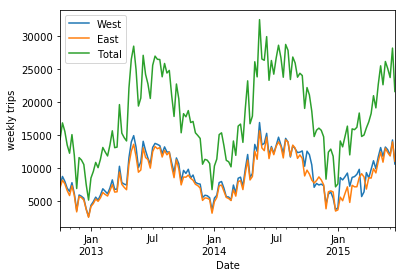

In [15]:
data.resample('W', how='sum').plot()
plt.ylabel('weekly trips');

In [16]:
pivoted = data.pivot_table(['East', 'West'],
                           index=data.index.date,
                           columns=data.index.hour,
                           fill_value=0)
pivoted.head()

East                                      ... West                 \
Date         0  1  2    3  4   5   6    7    8    9  ...   14   15   16   17   
2012-10-03    9  6  1  3.0  1  10  50   95  146  104 ...   77   72  133  192   
2012-10-04   11  0  6  3.0  1  11  51   89  134   94 ...   63   73  114  154   
2012-10-05    7  4  3  2.0  2   7  37  101  119   81 ...   63   80  120  144   
2012-10-06    7  5  2  2.0  1   2  15   16   47   55 ...   89  115  107  107   
2012-10-07    5  5  1  2.0  2   3   8   12   26   36 ...  126  122  132  118   

                                     
Date         18  19  20  21  22  23  
2012-10-03  122  59  29  25  24   5  
2012-10-04  137  57  27  31  25  11  
2012-10-05  107  42  27  11  10  16  
2012-10-06   41  40  25  18  14  15  
2012-10-07   68  26  19  12   9   5  

[5 rows x 48 columns]

In [17]:
X = pivoted.values
X.shape

(990, 48)

In [18]:
Xn=X
for i in range(0,990):
  Xn[i]=X[i]/sum(X[i])

## Q5. 

Visualize the data using PCA (two dimensions). Color the points by the day of the week

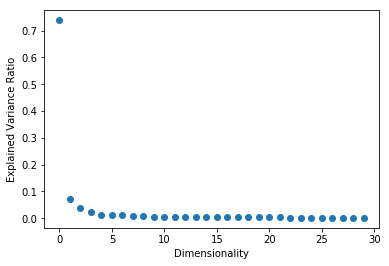

In [19]:
# Plot the biggest 30 eigenvalues.
n=30
from sklearn.decomposition import PCA
pca = PCA(n)
Xproj = pca.fit_transform(pd.DataFrame(Xn))
eigenvalues = pca.explained_variance_ratio_
plt.plot(np.arange(n), eigenvalues, 'o')
plt.xlabel("Dimensionality")
plt.ylabel("Explained Variance Ratio")
plt.show()

In [20]:
weekday = np.zeros(len(Xn))
for i,n in enumerate(Xn):
    weekday[i] = pivoted.index[i].weekday()

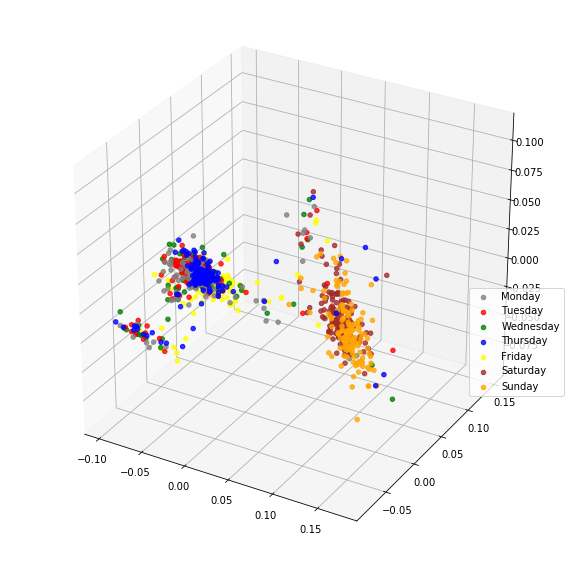

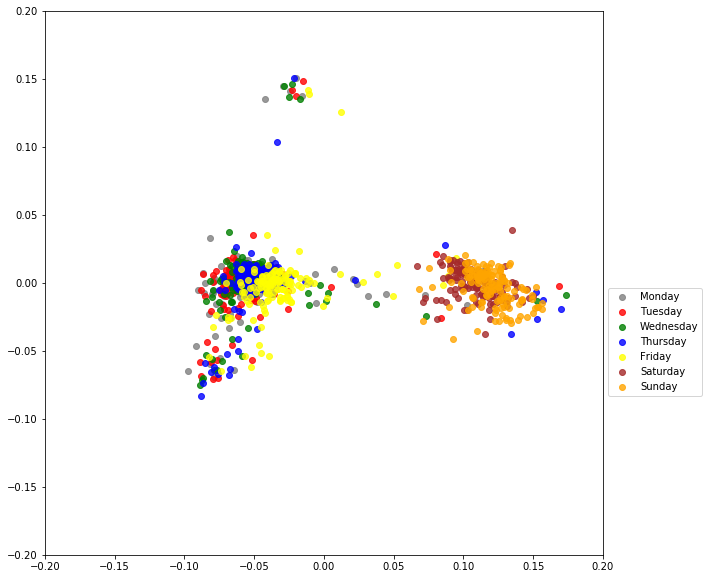

In [21]:
from mpl_toolkits.mplot3d import Axes3D

colors=('gray','red','green','blue','yellow','brown','orange')
#3-d plot    
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for d in range(0,7):
    ax.scatter(np.array(Xproj[weekday==d,0]), np.array(Xproj[weekday==d,1]), np.array(Xproj[weekday==d,2]),
        'o', color=colors[d], alpha=0.8)
plt.legend(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],bbox_to_anchor=(1, 0.5))
#2-d plot
fig = plt.figure(figsize=(10,10))
for d in range(0,7):
    plt.plot(np.array(Xproj[weekday==d,0]), np.array(Xproj[weekday==d,1]),
        'o', color=colors[d], alpha=0.8, label=d)
plt.xlim((-0.2,0.2))   
plt.ylim((-0.2,0.2)) 
plt.legend(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],bbox_to_anchor=(1, 0.5))